In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [56]:
t_u = torch.linspace(0,10, 100)
y_actual = 3.5 * t_u ** 2 + 2 * t_u + 0.5

In [57]:
# linear model to non-linear model
class NonLinearModel(nn.Module):
    def __init__(self):
        super(NonLinearModel, self).__init__()
        self.w2 = nn.Parameter(torch.randn(()))
        self.w1 = nn.Parameter(torch.randn(()))
        self.b = nn.Parameter(torch.randn(()))

    def forward(self, t_u):
        return self.w2 * t_u ** 2 + self.w1 * t_u + self.b

In [58]:
# function to train non-linear
def train_model(learning_rate, epochs=5000, log_interval=500):
    model = NonLinearModel()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(t_u)
        loss = criterion(output, y_actual)
        loss.backward()
        optimizer.step()

        if epoch % log_interval == 0:
            losses.append(loss.item())
            print(f"Epoch {epoch}, Loss: {loss.item()}")

    return model, losses

In [59]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.w = nn.Parameter(torch.randn(()))
        self.b = nn.Parameter(torch.randn(()))

    def forward(self, t_u):
        return self.w * t_u + self.b

In [60]:
# function to train linear for comparison
def train_linear_model(learning_rate=0.01, epochs=5000):
    model = LinearModel()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(t_u)
        loss = criterion(output, y_actual)
        loss.backward()
        optimizer.step()

    return model

In [61]:
# Training with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
all_losses = {}

In [52]:
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model, losses = train_model(lr)
    all_losses[lr] = losses


Training with learning rate: 0.1
Epoch 0, Loss: 45063.40625
Epoch 500, Loss: nan
Epoch 1000, Loss: nan
Epoch 1500, Loss: nan
Epoch 2000, Loss: nan
Epoch 2500, Loss: nan
Epoch 3000, Loss: nan
Epoch 3500, Loss: nan
Epoch 4000, Loss: nan
Epoch 4500, Loss: nan

Training with learning rate: 0.01
Epoch 0, Loss: 43156.19140625
Epoch 500, Loss: nan
Epoch 1000, Loss: nan
Epoch 1500, Loss: nan
Epoch 2000, Loss: nan
Epoch 2500, Loss: nan
Epoch 3000, Loss: nan
Epoch 3500, Loss: nan
Epoch 4000, Loss: nan
Epoch 4500, Loss: nan

Training with learning rate: 0.001
Epoch 0, Loss: 31010.623046875
Epoch 500, Loss: nan
Epoch 1000, Loss: nan
Epoch 1500, Loss: nan
Epoch 2000, Loss: nan
Epoch 2500, Loss: nan
Epoch 3000, Loss: nan
Epoch 3500, Loss: nan
Epoch 4000, Loss: nan
Epoch 4500, Loss: nan

Training with learning rate: 0.0001
Epoch 0, Loss: 27720.4453125
Epoch 500, Loss: 7.001882553100586
Epoch 1000, Loss: 4.380047798156738
Epoch 1500, Loss: 2.758902072906494
Epoch 2000, Loss: 1.7561107873916626
Epoch 

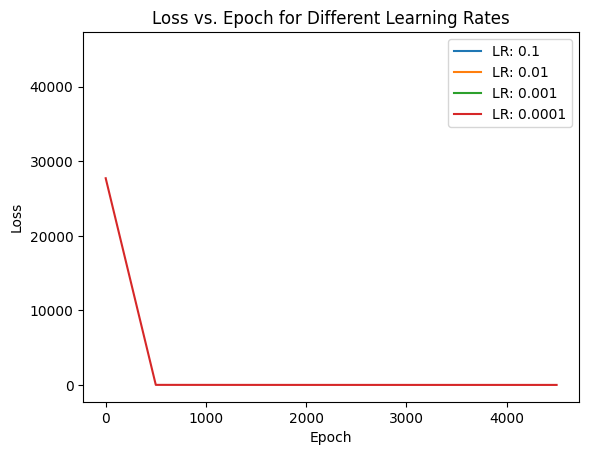

In [53]:
# Plotting the losses for each learning rate
for lr, losses in all_losses.items():
    plt.plot(range(0, 5000, 500), losses, label=f"LR: {lr}")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss vs. Epoch for Different Learning Rates")
plt.show()

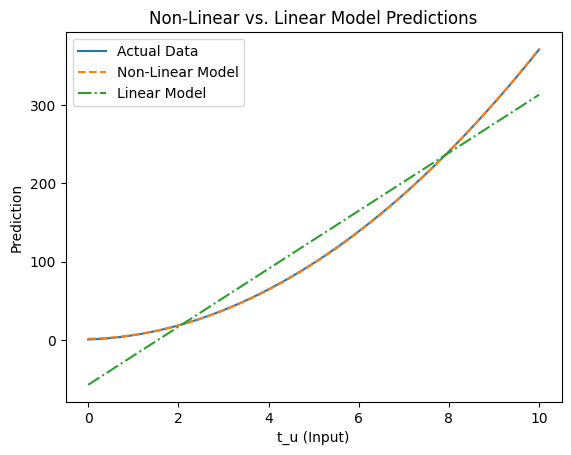

In [54]:
linear_model = train_linear_model()

# Plotting the models for comparison
plt.plot(t_u, y_actual, label="Actual Data")
plt.plot(t_u, model(t_u).detach(), label="Non-Linear Model", linestyle="--")
plt.plot(t_u, linear_model(t_u).detach(), label="Linear Model", linestyle="-.")
plt.xlabel("t_u (Input)")
plt.ylabel("Prediction")
plt.legend()
plt.title("Non-Linear vs. Linear Model Predictions")
plt.show()